# FIONA: Fresnel Integral Optimization via Non-uniform trAnforms

We want to compute the dimensionless amplification factor

$$
F(\mathbf{y}, w),
$$

evaluated at source position $\mathbf{y} = (y_1, y_2)$ and dimensionless
frequency $w \neq 0$.

---

### 1. Fresnel Integral Representation

The Fresnel diffraction integral is written as

$$
F(\mathbf{y}, w)
=
\frac{1}{i w \, 2\pi}
\exp\!\left( \frac{i w}{2} |\mathbf{y}|^2 \right)
\int_{\mathbb{R}^2} \mathrm{d}^2\mathbf{u}\;
\exp\!\left[
i \left(
\frac{|\mathbf{u}|^2}{2w}
- w\,\psi\!\left(\frac{\mathbf{u}}{w}\right)
- \mathbf{u}\cdot\mathbf{y}
\right)
\right].
$$

---

### 2. Finite-Domain Quadrature (“Core” Integral)

We compute the integral numerically over a finite domain
$|\mathbf{u}| \le U_{\max}$ using Gauss–Legendre quadrature:

$$
\int_{|\mathbf{u}| \le U_{\max}} \mathrm{d}^2\mathbf{u}\; f(\mathbf{u})
\;\approx\;
\sum_{j=1}^{N} W_j\, f(\mathbf{u}_j),
$$

where $\{\mathbf{u}_j = (u_{1j}, u_{2j})\}$ and $\{W_j\}$ are quadrature nodes
and weights (Cartesian or polar).

Define the phase

$$
\Phi_j(w)
=
\frac{|\mathbf{u}_j|^2}{2w}
-
w\,\psi\!\left(\frac{\mathbf{u}_j}{w}\right),
$$

and the complex coefficients

$$
c_j(w) = W_j \, e^{i \Phi_j(w)}.
$$

The truncated (“core”) integral is then

$$
I_{\text{core}}(\mathbf{y}, w)
=
\sum_{j=1}^{N}
c_j(w)\,
e^{-i \mathbf{u}_j \cdot \mathbf{y}}.
$$

This sum is evaluated efficiently using a **type-3 NUFFT**.

The corresponding Fresnel amplification from the finite domain is

$$
F_{\text{core}}(\mathbf{y}, w)
=
\frac{1}{i w \, 2\pi}
\exp\!\left( \frac{i w}{2} |\mathbf{y}|^2 \right)
I_{\text{core}}(\mathbf{y}, w).
$$

---

### 3. Free (Unlensed) Fresnel Integral

Now, we would like to compute the contribution to the integral from the oscillatory tail. We will show that this can be computed analytically. 

When the lens potential vanishes, $\psi \equiv 0$, the Fresnel integral reduces
to

$$
F^{(0)}(\mathbf{y}, w)
=
\frac{1}{i w \, 2\pi}
\exp\!\left( \frac{i w}{2} |\mathbf{y}|^2 \right)
\int_{\mathbb{R}^2} \mathrm{d}^2\mathbf{u}\;
\exp\!\left[
i \left(
\frac{|\mathbf{u}|^2}{2w}
- \mathbf{u}\cdot\mathbf{y}
\right)
\right].
$$

We can complete the square in the exponent:

$$
\frac{|\mathbf{u}|^2}{2w} - \mathbf{u}\cdot\mathbf{y}
=
\frac{|\mathbf{u}-w\mathbf{y}|^2}{2w}
-
\frac{w}{2}|\mathbf{y}|^2.
$$

After this transformation, the integral becomes a translation of a purely
quadratic phase and is therefore independent of $\mathbf{y}$. The remaining
integral factorizes into two one-dimensional Fresnel integrals, which can be
evaluated analytically through analytic continuation of the Gaussian integral
in the complex plane. With our normalization, we get:

$$
\int_{\mathbb{R}^2} \mathrm{d}^2\mathbf{u}\;
\exp\!\left[
i \left(
\frac{|\mathbf{u}|^2}{2w}
- \mathbf{u}\cdot\mathbf{y}
\right)
\right]
=
(2\pi i w)\,
\exp\!\left(-\frac{i w}{2}|\mathbf{y}|^2\right).
$$

Substituting this result back into the definition of $F^{(0)}$, all prefactors
cancel exactly, yielding

$$
F^{(0)}(\mathbf{y}, w) = 1.
$$

This identity holds for all $\mathbf{y}$ and all nonzero $w$.

---

### 4. Truncated Free Integral and Analytic Tail

In practice, the Fresnel integral is evaluated numerically over a finite domain
$|\mathbf{u}| \le U_{\max}$. Using the same quadrature nodes and weights as for
the lensed case, the truncated free integral is

$$
I^{(0)}_{\text{core}}(\mathbf{y}, w)
=
\sum_{j=1}^{N}
W_j \,
\exp\!\left(
i \frac{|\mathbf{u}_j|^2}{2w}
- i \mathbf{u}_j \cdot \mathbf{y}
\right).
$$

The corresponding Fresnel factor is

$$
F^{(0)}_{\text{core}}(\mathbf{y}, w)
=
\frac{1}{i w \, 2\pi}
\exp\!\left( \frac{i w}{2} |\mathbf{y}|^2 \right)
I^{(0)}_{\text{core}}(\mathbf{y}, w).
$$

Since the exact free Fresnel integral over $\mathbb{R}^2$ is known to be unity,
the contribution from the excluded region $|\mathbf{u}| > U_{\max}$ can be
obtained analytically by subtraction:

$$
F^{(0)}_{\text{tail}}(\mathbf{y}, w)
=
F^{(0)}(\mathbf{y}, w)
-
F^{(0)}_{\text{core}}(\mathbf{y}, w)
=
1 - F^{(0)}_{\text{core}}(\mathbf{y}, w).
$$

Assuming that lensing effects vanish asymptotically
($\psi(\mathbf{x}) \to 0$ as $|\mathbf{x}| \to \infty$), this free tail provides
an accurate approximation to the full tail of the lensed Fresnel integral.

---

### 5. Final Fresnel Amplification

The final result returned by the algorithm is

$$
F(\mathbf{y}, w)
=
F_{\text{core}}(\mathbf{y}, w)
+
\left[
1 - F^{(0)}_{\text{core}}(\mathbf{y}, w)
\right].
$$

In [1]:
# Uising FIONA v.0.1.1

import os
os.environ["FIONA_GL2D_DIR"] = "/n/netscratch/dvorkin_lab/Lab/nephremidze/2-LISA/0-fiona/gl_quads"
os.environ["FIONA_GL2D_STRICT"] = "0"
os.environ["OMP_NUM_THREADS"] = "112"

import pathlib, time, numpy as np, matplotlib.pyplot as plt
from fiona import SIS, set_num_threads, FresnelNUFFT3
from fiona.utils import *

from glow import lenses as glow_lenses
from glow import time_domain_c, freq_domain_c

set_num_threads(112)

def plot_overlays_ws(ws, F_fift, F_glow, quad_label, Umax,
                     title="F(w) overlay", align_phase=True):
    """
    Quick overlay plot for scalar F(w) from FIONA vs GLoW.
    quad_label: string describing quadrature resolution, e.g.
        "N_gl=128" or "N_r=4000, N_theta=100"
    """
    if align_phase:
        F_fift_al, _ = align_global_phase(F_fift, F_glow)
    else:
        F_fift_al = F_fift

    plt.figure()
    plt.loglog(ws, np.abs(F_fift_al), '-', label='FIONA', color='orchid')
    plt.loglog(ws, np.abs(F_glow), '--', label='GLoW', color='royalblue')
    plt.xlabel('w')
    plt.ylabel('|F(w)|')
    plt.legend()
    plt.title(f"{title}; {quad_label}, U={Umax}")
    plt.show()

def compare_plot_GLoW_FIONA(lens=SIS(psi0=1.0),
                            w_grid=np.logspace(-1.0, 1.0, 50),
                            y_star=1.2,
                            n_gl=1000,
                            Umax=50.0,
                            eps=1e-12,
                            shared_Umax=True,
                            numexpr_threads=None,
                            track_perf=True,
                            polar_coord=False,
                            n_r=None,
                            n_theta=None,
                            uniform_theta=False,
                            analytic_tail=True):

    fiona_gl2d_dir = os.environ.get("FIONA_GL2D_DIR")
    # check_precomputed_gl_files(n_gl, Umax, fiona_gl2d_dir)

    # Build a label for the plot title depending on quadrature mode
    if polar_coord:
        quad_label = f"$N_r={n_r}$, $N_{{\\theta}}={n_theta}$"
    else:
        quad_label = f"$N_{{GL}}={n_gl}$"

    t0 = time.perf_counter()
    nu3v = FresnelNUFFT3(
        lens,
        n_gl=n_gl,
        Umax=Umax,
        eps=eps,
        shared_Umax=shared_Umax,
        numexpr_threads=numexpr_threads,
        track_perf=track_perf,
        polar_coord=polar_coord,
        n_r=n_r,
        n_theta=n_theta,
        uniform_theta=uniform_theta,
        analytic_tail=analytic_tail
    )

    F_fiona = nu3v(w_grid, np.array([y_star]), np.array([0.0]))[:, 0]
    t1 = time.perf_counter()
    fiona_s = t1 - t0

    t2 = time.perf_counter()
    Psi = glow_lenses.Psi_SIS({'psi0': 1.0}, {})
    It  = time_domain_c.It_MultiContour_C(Psi, y=y_star)
    Fw  = freq_domain_c.Fw_FFT_C(It)
    F_glow = Fw(w_grid)
    t3 = time.perf_counter()
    glow_s = t3 - t2

    plot_overlays_ws(
        w_grid, F_fiona, F_glow,
        quad_label=quad_label,
        Umax=Umax,
        title=f"SIS @ y={y_star}",
        align_phase=True
    )

    print(f"FIONA time (single run): {fiona_s:.4f} s")
    print(f"GLoW time (single run): {glow_s:.4f} s")
    print(f"Speedup (GLoW/FIONA): {glow_s/fiona_s:.2f}×")


Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


# Cartesian Gauss-Legendre Nodes

## Finite-domain integral

[numexpr] using 64 threads (requested=64, MAX=64, cores=112)
[nufft] avg 39.78 cores over 0.824s (35.5% of 112 logical cores; CPU sec=32.764)

────────────────────────────────────────────────────────────
 Step 2: Coefficient Computation (Vectorized + NumExpr)
────────────────────────────────────────────────────────────
  CPU usage summary avg 10.58 cores over 1.292s (9.4% of 112 logical cores; CPU sec=13.666)

  Breakdown (percent of Step 2):
    2a. Pre-scaling (host)          :   1.11%  (  0.014370 s)

    2b. Coefficient build (total)   :  98.89%  (  1.277167 s)
        ├─ scale u/w (all w)        :   4.53%  (  0.058477 s)
        ├─ lens potential ψ(x)      :   3.72%  (  0.048036 s)
        ├─ phase calculation        :   2.53%  (  0.032631 s)
        ├─ exp(i·phase)             :  88.11%  (  1.137967 s)
        └─ unaccounted              :   0.00%  (  0.000056 s)

  Step 2 total                      : 100.00%  (  1.291538 s)
───────────────────────────────────────────────────────

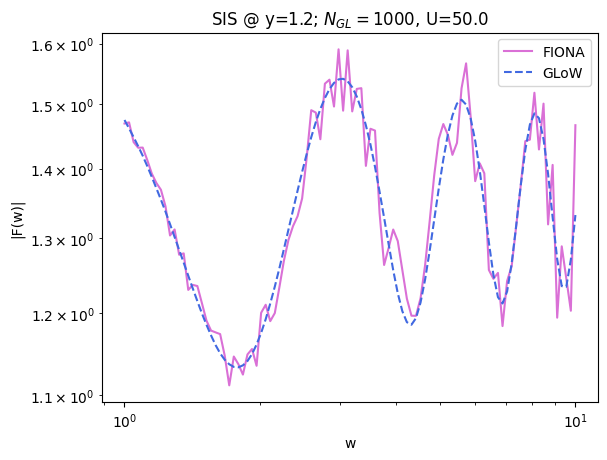

FIONA time (single run): 2.1776 s
GLoW time (single run): 0.0721 s
Speedup (GLoW/FIONA): 0.03×


In [2]:
compare_plot_GLoW_FIONA(lens=SIS(psi0=1.0),
                        n_gl = 1000,
                        w_grid = np.logspace(0., 1., 100),
                        y_star = 1.2,
                        Umax=50.0,
                        eps=1e-12,
                        shared_Umax=True,
                        numexpr_threads=64,
                        track_perf=True,
                        polar_coord=False,
                        analytic_tail=False)

## Oscillatory tail correction

[numexpr] using 64 threads (requested=64, MAX=64, cores=112)
[nufft] avg 41.98 cores over 0.692s (37.5% of 112 logical cores; CPU sec=29.042)

────────────────────────────────────────────────────────────
 Step 2: Coefficient Computation (Vectorized + NumExpr)
────────────────────────────────────────────────────────────
  CPU usage summary avg 10.44 cores over 1.254s (9.3% of 112 logical cores; CPU sec=13.092)

  Breakdown (percent of Step 2):
    2a. Pre-scaling (host)          :   1.22%  (  0.015301 s)

    2b. Coefficient build (total)   :  98.78%  (  1.238832 s)
        ├─ scale u/w (all w)        :   3.08%  (  0.038601 s)
        ├─ lens potential ψ(x)      :   3.57%  (  0.044728 s)
        ├─ phase calculation        :   2.99%  (  0.037501 s)
        ├─ exp(i·phase)             :  89.14%  (  1.117944 s)
        └─ unaccounted              :   0.00%  (  0.000058 s)

  Step 2 total                      : 100.00%  (  1.254134 s)
───────────────────────────────────────────────────────

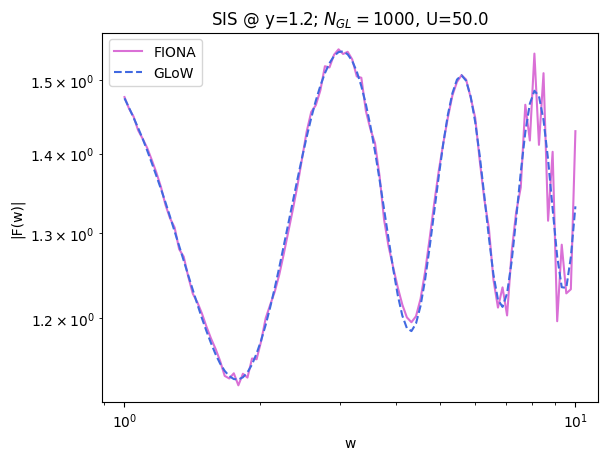

FIONA time (single run): 3.8705 s
GLoW time (single run): 0.0235 s
Speedup (GLoW/FIONA): 0.01×


In [3]:
compare_plot_GLoW_FIONA(lens=SIS(psi0=1.0),
                        n_gl = 1000,
                        w_grid = np.logspace(0., 1., 100),
                        y_star = 1.2,
                        Umax=50.0,
                        eps=1e-12,
                        shared_Umax=True,
                        numexpr_threads=64,
                        track_perf=True,
                        polar_coord=False,
                        analytic_tail=True)

# Polar Gauss-Legendre Nodes

## Trapezoidal quadrature in $\theta$

### Finite-domain (Umax = 70)

[numexpr] using 64 threads (requested=64, MAX=64, cores=112)
[nufft] avg 61.60 cores over 0.244s (55.0% of 112 logical cores; CPU sec=15.050)

────────────────────────────────────────────────────────────
 Step 2: Coefficient Computation (Vectorized + NumExpr)
────────────────────────────────────────────────────────────
  CPU usage summary avg 17.95 cores over 0.317s (16.0% of 112 logical cores; CPU sec=5.690)

  Breakdown (percent of Step 2):
    2a. Pre-scaling (host)          :   0.23%  (  0.000739 s)

    2b. Coefficient build (total)   :  99.77%  (  0.315966 s)
        ├─ scale u/w (all w)        :   8.93%  (  0.028295 s)
        ├─ lens potential ψ(x)      :   7.46%  (  0.023613 s)
        ├─ phase calculation        :   3.46%  (  0.010967 s)
        ├─ exp(i·phase)             :  79.90%  (  0.253039 s)
        └─ unaccounted              :   0.02%  (  0.000051 s)

  Step 2 total                      : 100.00%  (  0.316706 s)
───────────────────────────────────────────────────────

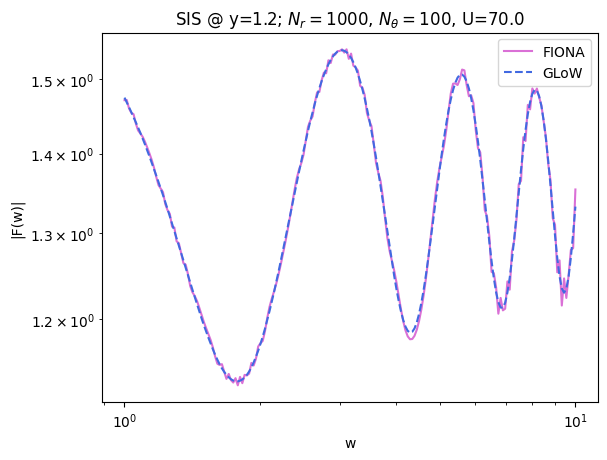

FIONA time (single run): 0.5988 s
GLoW time (single run): 0.0542 s
Speedup (GLoW/FIONA): 0.09×


In [14]:
compare_plot_GLoW_FIONA(lens=SIS(psi0=1.0),
                        w_grid = np.logspace(0., 1., 200),
                        y_star = 1.2,
                        Umax=70.0,
                        eps=1e-12,
                        shared_Umax=True,
                        numexpr_threads=64,
                        track_perf=True,
                        polar_coord=True,
                        n_r=1000,
                        n_theta=100,
                        uniform_theta=True,
                        analytic_tail=False)

## Oscillatory tail correction (Umax = 70)

[numexpr] using 64 threads (requested=64, MAX=64, cores=112)
[nufft] avg 61.92 cores over 0.203s (55.3% of 112 logical cores; CPU sec=12.587)

────────────────────────────────────────────────────────────
 Step 2: Coefficient Computation (Vectorized + NumExpr)
────────────────────────────────────────────────────────────
  CPU usage summary avg 17.24 cores over 0.324s (15.4% of 112 logical cores; CPU sec=5.580)

  Breakdown (percent of Step 2):
    2a. Pre-scaling (host)          :   0.17%  (  0.000563 s)

    2b. Coefficient build (total)   :  99.83%  (  0.322885 s)
        ├─ scale u/w (all w)        :   8.01%  (  0.025917 s)
        ├─ lens potential ψ(x)      :   7.36%  (  0.023805 s)
        ├─ phase calculation        :   3.46%  (  0.011203 s)
        ├─ exp(i·phase)             :  80.98%  (  0.261919 s)
        └─ unaccounted              :   0.01%  (  0.000041 s)

  Step 2 total                      : 100.00%  (  0.323449 s)
───────────────────────────────────────────────────────

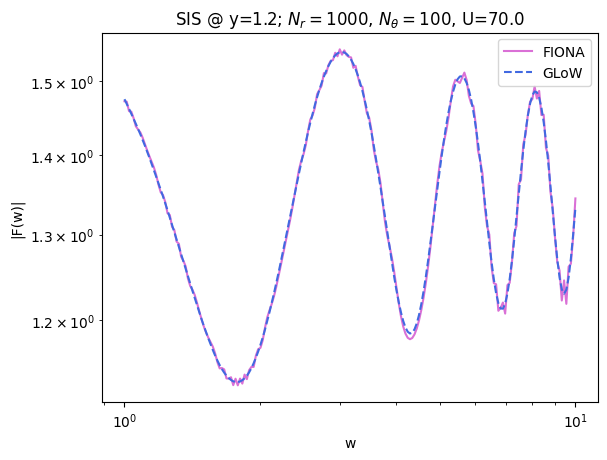

FIONA time (single run): 1.1297 s
GLoW time (single run): 0.0207 s
Speedup (GLoW/FIONA): 0.02×


In [6]:
compare_plot_GLoW_FIONA(lens=SIS(psi0=1.0),
                        w_grid = np.logspace(0., 1., 200),
                        y_star = 1.2,
                        Umax=70.0,
                        eps=1e-12,
                        shared_Umax=True,
                        numexpr_threads=64,
                        track_perf=True,
                        polar_coord=True,
                        n_r=1000,
                        n_theta=100,
                        uniform_theta=True,
                        analytic_tail=True)

### Finite-domain (Umax = 50)

[numexpr] using 64 threads (requested=64, MAX=64, cores=112)
[nufft] avg 63.78 cores over 0.257s (56.9% of 112 logical cores; CPU sec=16.387)

────────────────────────────────────────────────────────────
 Step 2: Coefficient Computation (Vectorized + NumExpr)
────────────────────────────────────────────────────────────
  CPU usage summary avg 17.59 cores over 0.331s (15.7% of 112 logical cores; CPU sec=5.817)

  Breakdown (percent of Step 2):
    2a. Pre-scaling (host)          :   0.52%  (  0.001732 s)

    2b. Coefficient build (total)   :  99.48%  (  0.328752 s)
        ├─ scale u/w (all w)        :   8.54%  (  0.028239 s)
        ├─ lens potential ψ(x)      :   8.67%  (  0.028638 s)
        ├─ phase calculation        :   3.97%  (  0.013114 s)
        ├─ exp(i·phase)             :  78.28%  (  0.258707 s)
        └─ unaccounted              :   0.02%  (  0.000054 s)

  Step 2 total                      : 100.00%  (  0.330485 s)
───────────────────────────────────────────────────────

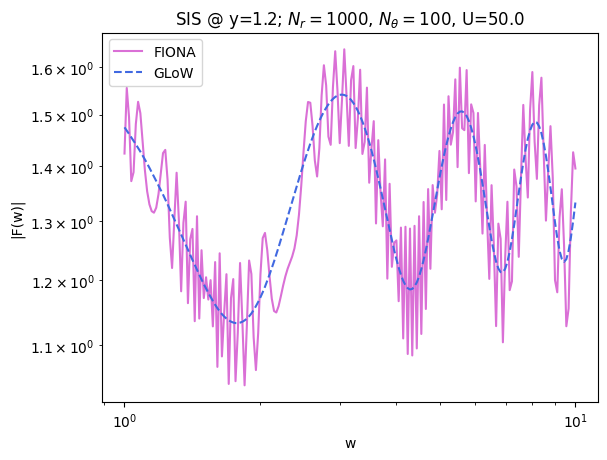

FIONA time (single run): 0.6213 s
GLoW time (single run): 0.0082 s
Speedup (GLoW/FIONA): 0.01×


In [12]:
compare_plot_GLoW_FIONA(lens=SIS(psi0=1.0),
                        w_grid = np.logspace(0., 1., 200),
                        y_star = 1.2,
                        Umax=50.0,
                        eps=1e-12,
                        shared_Umax=True,
                        numexpr_threads=64,
                        track_perf=True,
                        polar_coord=True,
                        n_r=1000,
                        n_theta=100,
                        uniform_theta=True,
                        analytic_tail=False)

## Oscillatory tail correction (Umax = 50)

[numexpr] using 64 threads (requested=64, MAX=64, cores=112)
[nufft] avg 64.09 cores over 0.257s (57.2% of 112 logical cores; CPU sec=16.489)

────────────────────────────────────────────────────────────
 Step 2: Coefficient Computation (Vectorized + NumExpr)
────────────────────────────────────────────────────────────
  CPU usage summary avg 17.33 cores over 0.323s (15.5% of 112 logical cores; CPU sec=5.591)

  Breakdown (percent of Step 2):
    2a. Pre-scaling (host)          :   0.20%  (  0.000647 s)

    2b. Coefficient build (total)   :  99.80%  (  0.321626 s)
        ├─ scale u/w (all w)        :   8.40%  (  0.027061 s)
        ├─ lens potential ψ(x)      :   7.20%  (  0.023216 s)
        ├─ phase calculation        :   3.43%  (  0.011043 s)
        ├─ exp(i·phase)             :  80.76%  (  0.260267 s)
        └─ unaccounted              :   0.01%  (  0.000039 s)

  Step 2 total                      : 100.00%  (  0.322274 s)
───────────────────────────────────────────────────────

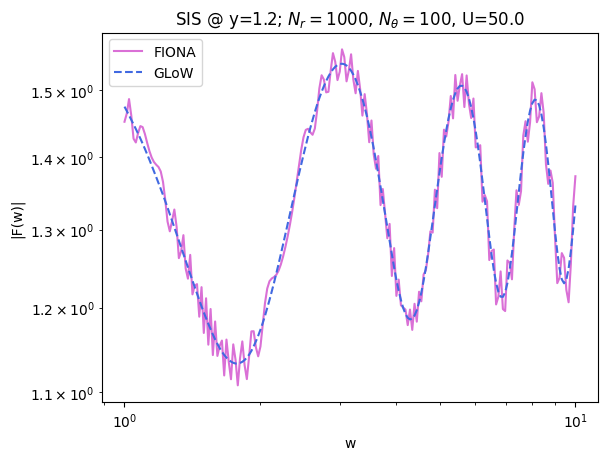

FIONA time (single run): 1.1894 s
GLoW time (single run): 0.0124 s
Speedup (GLoW/FIONA): 0.01×


In [13]:
compare_plot_GLoW_FIONA(lens=SIS(psi0=1.0),
                        w_grid = np.logspace(0., 1., 200),
                        y_star = 1.2,
                        Umax=50.0,
                        eps=1e-12,
                        shared_Umax=True,
                        numexpr_threads=64,
                        track_perf=True,
                        polar_coord=True,
                        n_r=1000,
                        n_theta=100,
                        uniform_theta=True,
                        analytic_tail=True)

## Gauss-Legendre quadrature in $\theta$

Requires a higher number of nodes than a trapezoidal quadrature.

## Finite-domain (Umax=70.0, $n_{\theta}=100$)

[numexpr] using 64 threads (requested=64, MAX=64, cores=112)
[nufft] avg 59.45 cores over 0.246s (53.1% of 112 logical cores; CPU sec=14.638)

────────────────────────────────────────────────────────────
 Step 2: Coefficient Computation (Vectorized + NumExpr)
────────────────────────────────────────────────────────────
  CPU usage summary avg 16.76 cores over 0.338s (15.0% of 112 logical cores; CPU sec=5.658)

  Breakdown (percent of Step 2):
    2a. Pre-scaling (host)          :   0.29%  (  0.000980 s)

    2b. Coefficient build (total)   :  99.71%  (  0.336254 s)
        ├─ scale u/w (all w)        :   7.84%  (  0.026442 s)
        ├─ lens potential ψ(x)      :   8.87%  (  0.029899 s)
        ├─ phase calculation        :   3.35%  (  0.011313 s)
        ├─ exp(i·phase)             :  79.63%  (  0.268549 s)
        └─ unaccounted              :   0.02%  (  0.000051 s)

  Step 2 total                      : 100.00%  (  0.337236 s)
───────────────────────────────────────────────────────

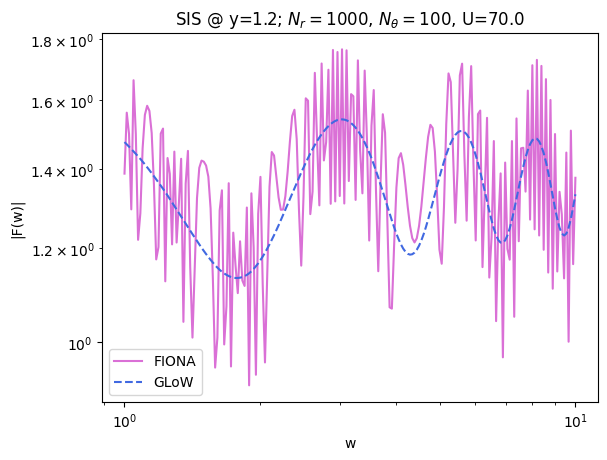

FIONA time (single run): 0.6222 s
GLoW time (single run): 0.0558 s
Speedup (GLoW/FIONA): 0.09×


In [15]:
compare_plot_GLoW_FIONA(lens=SIS(psi0=1.0),
                        w_grid = np.logspace(0., 1., 200),
                        y_star = 1.2,
                        Umax=70.0,
                        eps=1e-12,
                        shared_Umax=True,
                        numexpr_threads=64,
                        track_perf=True,
                        polar_coord=True,
                        n_r=1000,
                        n_theta=100,
                        uniform_theta=False,
                        analytic_tail=False)

## Finite-domain (Umax=70.0, $n_{\theta}=500$)

[numexpr] using 64 threads (requested=64, MAX=64, cores=112)
[nufft] avg 63.84 cores over 0.526s (57.0% of 112 logical cores; CPU sec=33.555)

────────────────────────────────────────────────────────────
 Step 2: Coefficient Computation (Vectorized + NumExpr)
────────────────────────────────────────────────────────────
  CPU usage summary avg 9.74 cores over 1.178s (8.7% of 112 logical cores; CPU sec=11.474)

  Breakdown (percent of Step 2):
    2a. Pre-scaling (host)          :   0.26%  (  0.003024 s)

    2b. Coefficient build (total)   :  99.74%  (  1.174896 s)
        ├─ scale u/w (all w)        :   3.22%  (  0.037970 s)
        ├─ lens potential ψ(x)      :   3.76%  (  0.044331 s)
        ├─ phase calculation        :   2.26%  (  0.026663 s)
        ├─ exp(i·phase)             :  90.49%  (  1.065900 s)
        └─ unaccounted              :   0.00%  (  0.000032 s)

  Step 2 total                      : 100.00%  (  1.177921 s)
────────────────────────────────────────────────────────

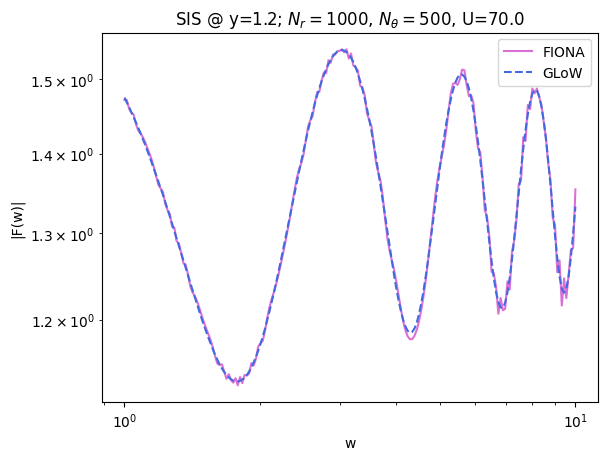

FIONA time (single run): 1.7797 s
GLoW time (single run): 0.0160 s
Speedup (GLoW/FIONA): 0.01×


In [9]:
compare_plot_GLoW_FIONA(lens=SIS(psi0=1.0),
                        w_grid = np.logspace(0., 1., 200),
                        y_star = 1.2,
                        Umax=70.0,
                        eps=1e-12,
                        shared_Umax=True,
                        numexpr_threads=64,
                        track_perf=True,
                        polar_coord=True,
                        n_r=1000,
                        n_theta=500,
                        uniform_theta=False,
                        analytic_tail=False)

## Oscillatory tail correction (Umax=70.0, $n_{\theta}=500$)

[numexpr] using 64 threads (requested=64, MAX=64, cores=112)
[nufft] avg 63.96 cores over 0.569s (57.1% of 112 logical cores; CPU sec=36.381)

────────────────────────────────────────────────────────────
 Step 2: Coefficient Computation (Vectorized + NumExpr)
────────────────────────────────────────────────────────────
  CPU usage summary avg 10.09 cores over 1.183s (9.0% of 112 logical cores; CPU sec=11.944)

  Breakdown (percent of Step 2):
    2a. Pre-scaling (host)          :   0.47%  (  0.005609 s)

    2b. Coefficient build (total)   :  99.53%  (  1.177349 s)
        ├─ scale u/w (all w)        :   3.38%  (  0.040017 s)
        ├─ lens potential ψ(x)      :   4.07%  (  0.048200 s)
        ├─ phase calculation        :   2.68%  (  0.031725 s)
        ├─ exp(i·phase)             :  89.38%  (  1.057364 s)
        └─ unaccounted              :   0.00%  (  0.000043 s)

  Step 2 total                      : 100.00%  (  1.182959 s)
───────────────────────────────────────────────────────

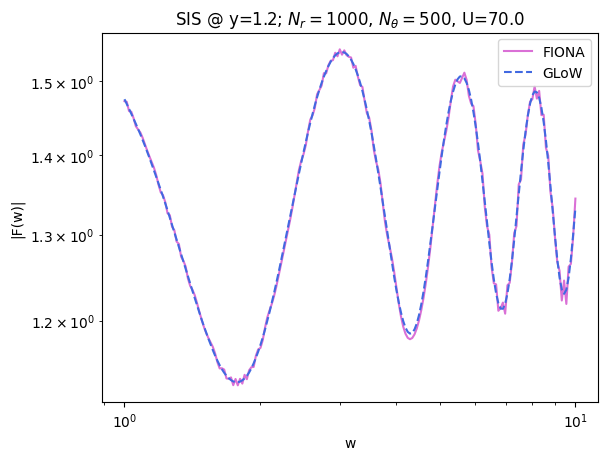

FIONA time (single run): 3.6772 s
GLoW time (single run): 0.0135 s
Speedup (GLoW/FIONA): 0.00×


In [16]:
compare_plot_GLoW_FIONA(lens=SIS(psi0=1.0),
                        w_grid = np.logspace(0., 1., 200),
                        y_star = 1.2,
                        Umax=70.0,
                        eps=1e-12,
                        shared_Umax=True,
                        numexpr_threads=64,
                        track_perf=True,
                        polar_coord=True,
                        n_r=1000,
                        n_theta=500,
                        uniform_theta=False,
                        analytic_tail=True)